<a href="https://colab.research.google.com/github/trifarameliniaa/Belajar_AI/blob/DS/Salinan_dari_Principal_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing #scale
import matplotlib.pyplot as plt

# Data Generation Code

In [ ]:
genes = ['gene' + str(i) for i in range(1,101)]
genes[:3]

['gene1', 'gene2', 'gene3']

wt= wild type samples


ko= knock out samples

In [ ]:
wt = ['wt' + str(i) for i in range(1,6)]
ko = ['ko' + str(i) for i in range(1,6)]
wt[:3]

['wt1', 'wt2', 'wt3']

In [ ]:
data = pd.DataFrame(columns=[*wt, *ko], index=genes)
data.head()

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
for gene in data.index: 
    data.loc[gene,'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
    data.loc[gene,'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)

In [ ]:
print(data.head())

       wt1  wt2  wt3  wt4  wt5  ko1  ko2  ko3  ko4  ko5
gene1  583  551  547  548  596  378  404  375  394  438
gene2  234  287  275  283  288  587  604  547  598  559
gene3   24   20   14   16   12  491  483  461  487  504
gene4  194  184  194  183  176  419  428  444  423  439
gene5  158  166  143  170  145  823  812  786  804  754


In [ ]:
print(data.shape)

(100, 10)


In [ ]:
data=data.T
data.head()

,gene1,gene2,gene3,gene4,gene5,gene6,gene7,gene8,gene9,gene10,...,gene91,gene92,gene93,gene94,gene95,gene96,gene97,gene98,gene99,gene100
wt1,583,234,24,194,158,869,857,334,304,1004,...,696,351,864,213,920,29,88,755,769,663
wt2,551,287,20,184,166,876,810,356,349,987,...,728,331,851,200,890,38,91,771,783,672
wt3,547,275,14,194,143,923,823,367,279,964,...,781,339,875,194,930,38,65,746,725,648
wt4,548,283,16,183,170,934,849,351,350,1019,...,760,331,855,209,890,50,75,747,803,649
wt5,596,288,12,176,145,957,850,333,340,960,...,738,368,851,215,976,32,93,752,803,666


Data yang dimiliki adalah data dengan 100 fitur (genes) ditunjukkan oleh **KOLOM**. Dan 10 observasi data **BARIS**

# Perform PCA on the data

scale = $\frac{(measure-mean)^2}{n.measurements}$

In [ ]:
# First center and scale the data
scaled_data = preprocessing.scale(data)

In [ ]:
pca = PCA() # create a PCA object
pca.fit(scaled_data) # do the math
pca_data = pca.transform(scaled_data) # get PCA coordinates for scaled_data

# Draw a scree plot and a PCA plot

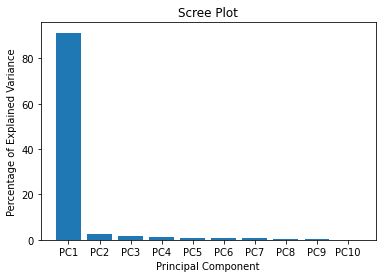

In [ ]:
#The following code constructs the Scree plot
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [ ]:
np.round(pca.explained_variance_ratio_* 100, decimals=1)

array([91.3,  2.6,  1.6,  1.3,  0.9,  0.9,  0.7,  0.4,  0.2,  0. ])

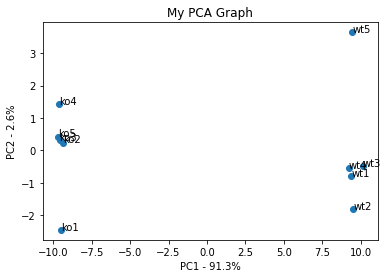

In [ ]:

#the following code makes a fancy looking plot using PC1 and PC2
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)
 
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
 
plt.show()

**Insight**



*   Secara umum data terdiri atas 2 cluster yaitu ko dan wt
*   Semakin jauh jarak titik observasi semakin jauh karakteristiknya
*   Nilai informasi yang ditangkap oleh visualisi diatas PC 1 sebesar 92.5%
 





# Determine which genes had the biggest influence on PC1

In [ ]:
## get the name of the top 10 measurements (genes) that contribute
## most to pc1.
## first, get the loading scores
loading_scores = pd.Series(pca.components_[0], index=genes)
loading_scores 

gene1      0.101117
gene2     -0.103558
gene3     -0.104540
gene4     -0.104357
gene5     -0.104452
             ...   
gene96    -0.104601
gene97    -0.104340
gene98     0.085411
gene99     0.104013
gene100   -0.101181
Length: 100, dtype: float64

Loading score menunjukkan nilai korelasi fitur terhadap PC, semakin besar loading score semakin memberi kontribusi yang besar terhadap PC

In [ ]:
## now sort the loading scores based on their magnitude (besar ke kecil)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
sorted_loading_scores

gene96    0.104601
gene93    0.104583
gene47    0.104567
gene30    0.104553
gene23    0.104551
            ...   
gene36    0.072208
gene12    0.058776
gene75    0.057071
gene61    0.042596
gene85    0.006902
Length: 100, dtype: float64

In [ ]:
# get the names of the top 10 genes
top_10_genes = sorted_loading_scores[0:10].index.values

In [ ]:
## print the gene names and their scores (and +/- sign)
print(loading_scores[top_10_genes])

gene96   -0.104601
gene93    0.104583
gene47    0.104567
gene30    0.104553
gene23    0.104551
gene11   -0.104551
gene87    0.104549
gene94   -0.104547
gene3    -0.104540
gene19   -0.104537
dtype: float64


In [ ]:
# 10 variabel yang memberikan impact tertinggi pada PC

PCA bagian dari Unsupervised Learning

PCA dapat Melihat karakteristik data high dimensi



## Self Learning: Membuat PCA dengan data Iris yang telah dikenali sebelumnya